# ELEC5622 Medical Signal Segmentation and Classification

**Objectives:**

In this experiment, we will use publicly accessible MRI datasets for image segmentation tasks, including：

* edge-based segmentation,

* unsupervised classification-based segmentation.

And use Pima Indians Diabetes Database to perform medical signal classification through support vector machines.

**DUE DATE**

This experiment is worth 5%, and the submission deadline is September 12, Monday (Week 7) at 11:59pm.


## I. MRI Dataset
Three views (3 pts),
ratio (1 pt)
explanation (1 pt)

To load the MRI dataset,run:

D = io.imread("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/attention-mri.tif")

The MRI data, D, is stored as a 157-by-189-by-68 NumPy array.
You can show image of each of the frame within the dataset using the imshow() function imported from matplotlib.pyplot.
Please use this function to show the data in the axial view at slice 16, the data in the sagittal view at slice 64, and the data in the coronal view at slice 64. And set the aspect of the axis scaling (the ratio of y-unit to x-unit) to 0.5 when plotting the images.

Run the following codes to install necessary APIs and import libraries.

In [ ]:
#Install opencv and sklearn packages
! pip install opencv-python
! pip install sklearn
! pip install scikit-image


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [ ]:
import numpy as np
from skimage import io
from skimage import feature
import cv2 #opencv
from scipy import ndimage
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


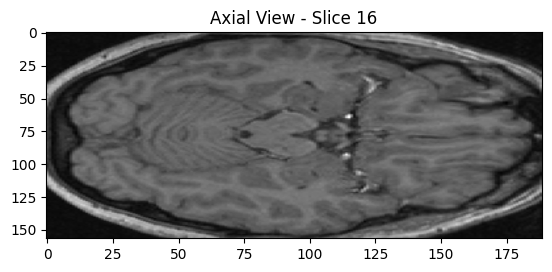

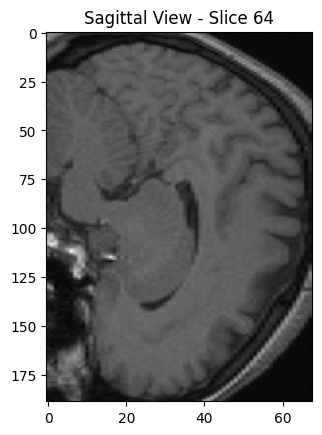

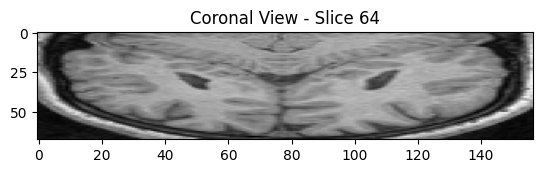

In [ ]:
#TODO:

# Assuming you have the MRI data stored in a variable called 'D'
# D = np.random.rand(157, 189, 68)  # Replace this with your actual data
D = io.imread("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/attention-mri.tif")
# Set the aspect ratio
aspect_ratio = 0.5

# Axial View at Slice 16
axial_slice = 16
axial_data = D[:, :, axial_slice]
plt.imshow(axial_data, cmap='gray' ,aspect=aspect_ratio)
plt.title(f"Axial View - Slice {axial_slice}")
#plt.subplot(131)
plt.show()

# Sagittal View at Slice 64
sagittal_slice = 64
sagittal_data = D[sagittal_slice, :, :]
plt.imshow(sagittal_data,cmap='gray', aspect=aspect_ratio)
#plt.subplot(132)
plt.title(f"Sagittal View - Slice {sagittal_slice}")
plt.show()

# Coronal View at Slice 64
coronal_slice = 64
coronal_data = D[:, coronal_slice, :].T  # Transpose for proper orientation
plt.imshow(coronal_data, cmap='gray', aspect=aspect_ratio)
#plt.subplot(133)
plt.title(f"Coronal View - Slice {coronal_slice}")
plt.show()




## II. Edge Filters

Edge provides critical information about the shape of the region of interest (ROI), and serves as an important step in many segmentation algorithms. In this task, we work on the data in the axial view at slice 16 for edge detection.

(1) Please calculate the image gradients along x and y directions with the function cv2.Sobel(), and the gradient magnitude using Numpy.sqrt() function, and plot image gradients ("Gx", "Gy") as well as gradient magnitude ("Gmat") using imshow() function. (Hints: https://opencv24-python-tutorials.readthedocs.io/en/stable/py_tutorials/py_imgproc/py_gradients/py_gradients.html)


(2) Please define the Prewitt kernels in both x and y directions, and use the cv2.filter2D() function to complete prewitt edge filtering.

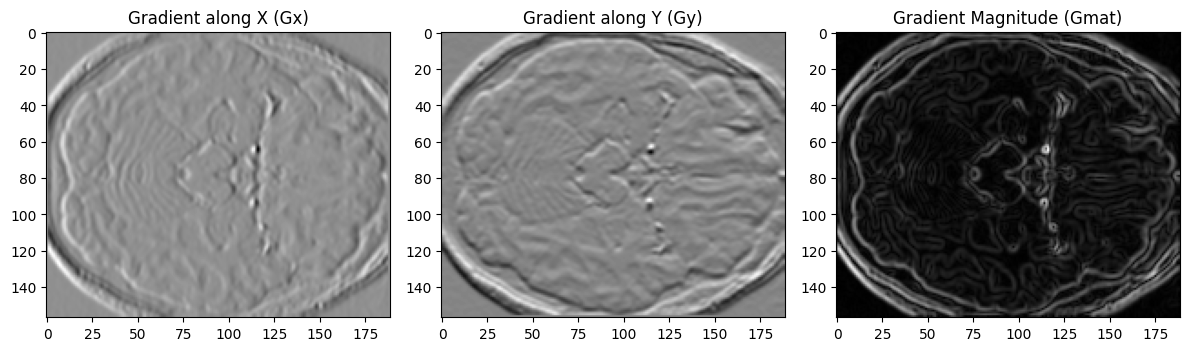

In [ ]:
#TODO:
axial_data = D[:, :, axial_slice]
Gx = cv2.Sobel(axial_data, cv2.CV_64F, 1, 0, ksize=5)
Gy = cv2.Sobel(axial_data, cv2.CV_64F, 0, 1, ksize=5)
Gmat = np.sqrt(Gx**2 + Gy**2)
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(Gx, cmap='gray')
plt.title("Gradient along X (Gx)")

plt.subplot(132)
plt.imshow(Gy, cmap='gray')
plt.title("Gradient along Y (Gy)")

plt.subplot(133)
plt.imshow(Gmat, cmap='gray')
plt.title("Gradient Magnitude (Gmat)")

plt.tight_layout()
plt.show()


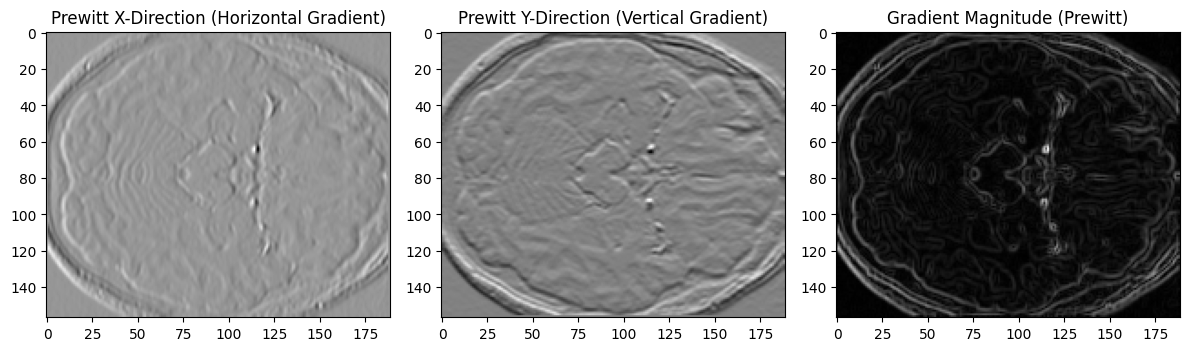

In [ ]:
#axial_data = D[:, :, axial_slice]
#axial_data = cv2.imread('image', cv2.IMREAD_GRAYSCALE)
Kx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
Ky = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)
Gx = cv2.filter2D(axial_data, -1, Kx)
Gy = cv2.filter2D(axial_data, -1,Ky)
Gmag = np.sqrt(Gx**2 + Gy**2)
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(Gx, cmap='gray')
plt.title("Prewitt X-Direction (Horizontal Gradient)")

plt.subplot(132)
plt.imshow(Gy, cmap='gray')
plt.title("Prewitt Y-Direction (Vertical Gradient)")

plt.subplot(133)
plt.imshow(Gmag, cmap='gray')
plt.title("Gradient Magnitude (Prewitt)")

plt.tight_layout()
plt.show()

(3) Please conducting a Canny edge detection with the function of feature.canny() and plot the results using imshow() function. Please briefly explain Canny edge detection. What are the values and meaning of the double thresholds used in your canny edge detection?
Please change the lower and upper thresholds to (2, 5) and (3, 15), respectively; How does the edge detection change?

(4) What is spatial frequency? Are edge filters low-pass filtering operation or high-pass filtering operation?


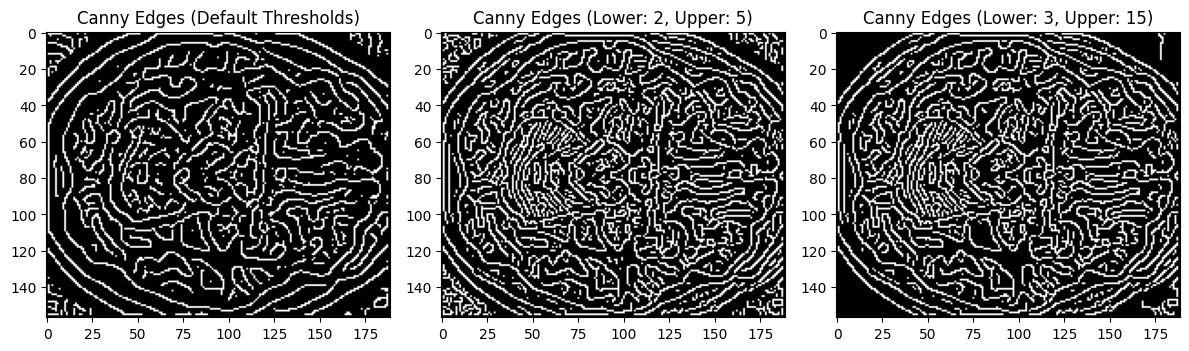

In [ ]:


# Assuming you have already defined 'axial_data'
# Apply Canny edge detection with default thresholds
edges_default = feature.canny(axial_data, sigma=2)

# Apply Canny edge detection with lower and upper thresholds of (2, 5)
edges_lower = feature.canny(axial_data, low_threshold=2, high_threshold=5) #sigma=2

# Apply Canny edge detection with lower and upper thresholds of (3, 15)
edges_upper = feature.canny(axial_data, low_threshold=3, high_threshold=15)# sigma=5

# Plot the results
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(edges_default, cmap='gray')
plt.title("Canny Edges (Default Thresholds)")

plt.subplot(132)
plt.imshow(edges_lower, cmap='gray')
plt.title("Canny Edges (Lower: 2, Upper: 5)")

plt.subplot(133)
plt.imshow(edges_upper, cmap='gray')
plt.title("Canny Edges (Lower: 3, Upper: 15)")

plt.tight_layout()
plt.show()


## III. Kmeans clustering
Kmeans clustering is an unsupervised method for grouping similar pixels in an image, which could contribute to segmentation algorithms. In this task, we work on the data in the axial view at slice 16 for kmeans clustering.

(1) Please describe the process of kmeans clustering. What is the difference between supervised and unsupervised methods? What are their advantages and disadvantages?

(2) Import KMeans from the sklearn.cluster package.

(3) Please group the pixels in slice 16 using the function of KMeans(). Show the results with 4, 8, 20 clusters, respectively. (Hints: You can reshape the image to a 1-D vector as the input of KMeans() function.)


To show the results, please replace the intensity value at each pixel with the intensity value of its corresponding cluster
centres and display the resulting image use the function imshow(). This will give each cluster a unique color. Please compare the results.


(4) If you repeat the algorithm for several times, will the results change?

(5) If 4 clusters are to be generated, please plot the relationship between within-cluster sums of point-to-centroid distances (kmeans.inertia_) and number of iterations (kmeans.n_iter_). The x-axis corresponds to the number of iterations and the y-axis corresponds to the within-cluster sums.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


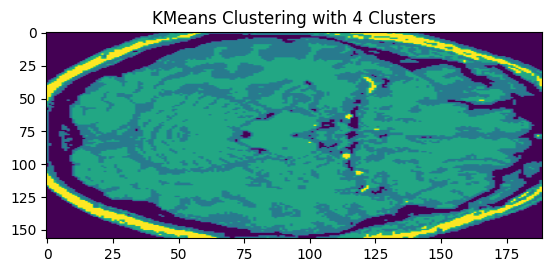

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


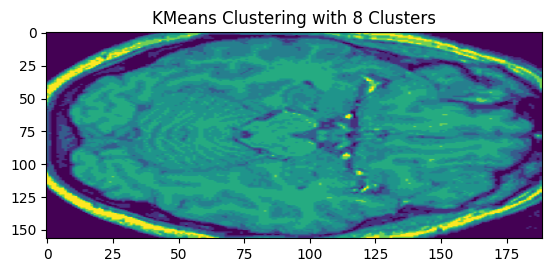

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


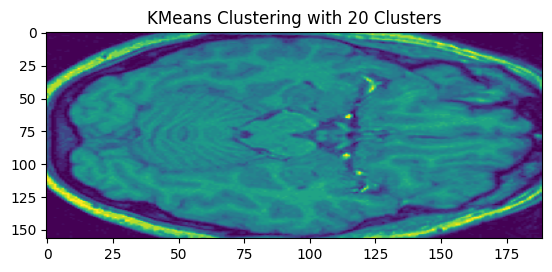

In [ ]:
#TODO:
from sklearn.cluster import KMeans


# Assuming you have your MRI data stored as a 157x189x68 NumPy array named 'D'
# Extract the axial slice at index 16
axial_slice = D[:, :, 16]

# Reshape the slice into a 1-D vector
pixels = axial_slice.reshape(-1, 1)

# Define the number of clusters
n_clusters = [4, 8, 20]

# Perform KMeans clustering for each number of clusters
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=0)
    labels = kmeans.fit_predict(pixels)

    # Get cluster centers
    cluster_centers = kmeans.cluster_centers_

    # Replace pixel values with cluster center values
    clustered_image = cluster_centers[labels].reshape(axial_slice.shape)

    # Display the clustered image
    plt.figure()
    plt.imshow(clustered_image, cmap='viridis', aspect=0.5)
    plt.title(f'KMeans Clustering with {n} Clusters')
    plt.show()








/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

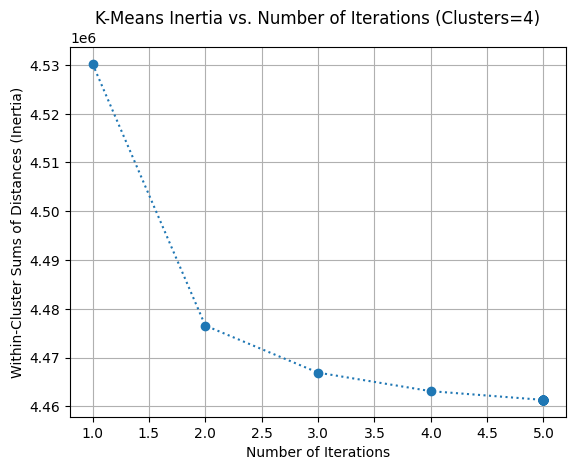

In [ ]:
axial_slice = D[:, :, 16]

# Reshape the slice into a 1-D vector
pixels = axial_slice.reshape(-1, 1)

# Number of clusters
n_clusters = 4

# Initialize lists to store inertia and number of iterations
inertia_values = []
n_iterations = []

# Fit K-Means for a range of iterations
for i in range(1, 50):  # You can adjust the range of iterations as needed
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, max_iter=i)
    kmeans.fit(pixels)
    inertia = kmeans.inertia_
    n_iter = kmeans.n_iter_
    inertia_values.append(inertia)
    n_iterations.append(n_iter)

# Plot the relationship
plt.figure()
plt.plot(n_iterations, inertia_values, marker='o', linestyle=':')
plt.xlabel('Number of Iterations')
plt.ylabel('Within-Cluster Sums of Distances (Inertia)')
plt.title(f'K-Means Inertia vs. Number of Iterations (Clusters={n_clusters})')
plt.grid(True)
plt.show()

# New Section

## IV. Support Vector Machine

Support-vector machines (SVMs) are supervised learning machine learning models widely used for classification and regression tasks. In medical research, SVMs can be used to predict the health status of a patient for a target disease. In this experiment, we are going to train a SVM model to predict Diabetes.

Please download the pima.csv file from Canvas and save it to the same directory as this jupyter notebook, and run the following code to load the datasets.

**Step 1: Import APIs and Load the PIMA dataset**

In [ ]:
import os
from csv import reader
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm

# Load data
with open("pima.csv") as f:
    csv_data = reader(f, delimiter=',')
    raw_data = np.array(list(csv_data),dtype=object)

# Preprocess data
data_x = []
data_y = []
tuple_len = len(raw_data[0])
for i in raw_data:
    if not i:
        continue
    data_x.append([float(j) for j in i[0:tuple_len - 2]])
    if i[tuple_len - 1] == "yes":
        data_y.append(1)
    else:
        data_y.append(0)



**Step 2: Split the dataset into training and testing**

*   List item
*   List item



In [ ]:
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(
    data_x, data_y, test_size=0.33, random_state=73)

**Step 3: Traning a SVM model and output accuracy**

In [ ]:
#TODO:
from sklearn.metrics import accuracy_score
svm_classifier = svm.SVC(kernel='linear', random_state=0)

# Train the SVM model on the training data
svm_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.74
